Warning message:
"Transformation introduced infinite values in continuous x-axis"

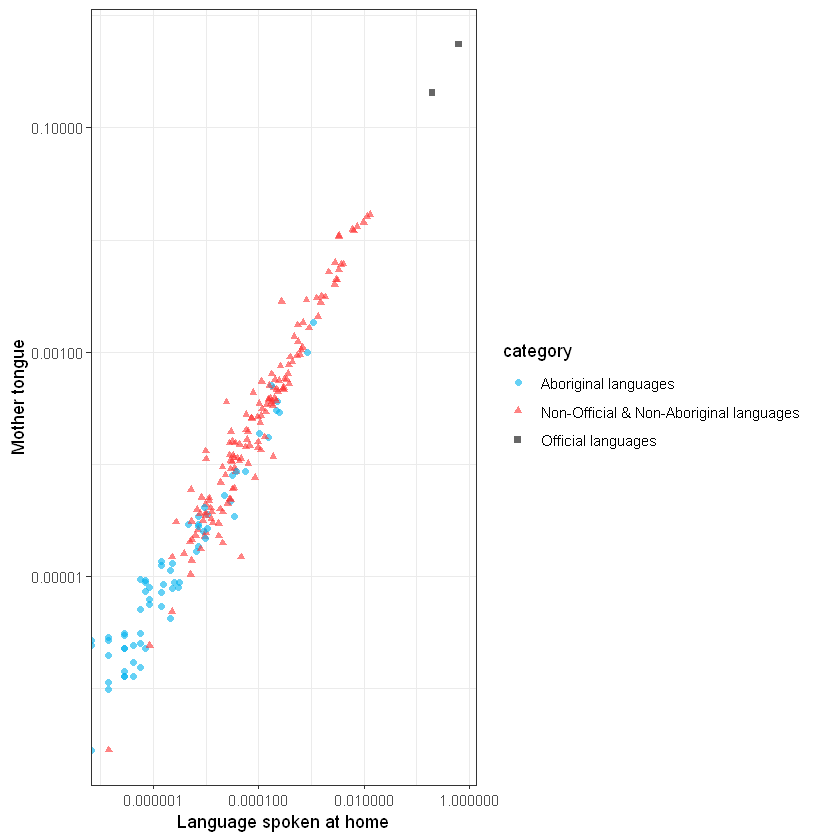

In [9]:
library(tidyverse)
df <- read_csv("can_lang.csv")
df <- mutate(df, most_at_home = most_at_home / 35151728)
df <- mutate(df, mother_tongue = mother_tongue / 35151728)
ggplot(df, aes(
    x = most_at_home,
    y = mother_tongue,
    colour = category,
    shape = category
))+ 
geom_point(alpha = 0.6)+ 
xlab("Language spoken at home") + 
ylab("Mother tongue") +
scale_x_log10(labels = scales::comma)+ 
scale_y_log10(labels = scales::comma)+
scale_color_manual(values = c("deepskyblue2","firebrick1","black")) +# custom colours
theme_bw() # use a theme to have a white background

# Reading in data locally and from the web

## Chapter learning objectives
By the end of the chapter, 

- read data into R using a relative path and a url
- compare and contrast the following functions:
    - `read_csv` reads comma delimited files
    - `read_tsv` reads tab delimited files,
    - `read_csv2` reads semicolon separated files (common in countries where , is used as the decimal place),
    - `read_delim` reads in files with any delimiter
    - `read_excel`
- match the following `tidyverse` `read_*` function arguments to their descriptions:
    - `file` 
    - `delim`
    - `col_names`
    - `skip`
- choose the appropriate `tidyverse` `read_*` function and function arguments to load a given plain text tabular data set into R
- use `readxl` package's `read_excel` function and arguments to load a sheet from an excel file into R
- connect to a database using the `DBI` package's `dbConnect` function
- list the tables in a database using the `DBI` package's `dbListTables` function
- create a reference to a database table that is queriable using the `tbl` from the `dbplyr` package
- retrieve data from a database query and bring it into R using the `collect` function from the `dbplyr` package
- use `write_csv` to save a data frame to a `.csv` file

- (*optional*) scrape data from the web
    - read/scrape data from an internet URL using the rvest `html_nodes` and `html_text` functions
    - compare downloading tabular data from a plain text file (e.g. `.csv`) from the web versus scraping data from a `.html` file


read_fwf() reads fixed width files. You can specify fields either by their widths with fwf_widths() or their position with fwf_positions(). read_table() reads a common variation of fixed width files where columns are separated by white space.

read_log() reads Apache style log files. (But also check out webreadr which is built on top of read_log() and provides many more helpful tools.)

In [47]:
read_csv("a,b,c
1,2,3
4,5,6")

a,b,c
1,2,3
4,5,6


In [48]:
read_csv("The first line of metadata
  The second line of metadata
  a,b,c
  1,2,3", skip = 2)

a,b,c
1,2,3


In [49]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

x,y,z
1,2,3


In [50]:
read_csv("1,2,3\n4,5,6", col_names = FALSE)

X1,X2,X3
1,2,3
4,5,6


In [51]:
read_csv("1,2,3\n4,5,6", col_names = c("x", "y", "z"))

x,y,z
1,2,3
4,5,6


In [52]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
1,2,NA


In [11]:
canlang_data <- read_csv("can_lang.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  category = col_character(),
  language = col_character(),
  mother_tongue = col_double(),
  most_at_home = col_double(),
  most_at_work = col_double(),
  lang_known = col_double()
)



### `read_delim` as a more flexible method to get tabular data into R

When our tabular data comes in a different format, we can use the `read_delim` function instead. For example, a different version of this same data set has no column names and uses tabs as the delimiter instead of commas. 


In [19]:
canlang_data <- read_delim("can_lang.tsv.txt", delim = "\t", col_names = FALSE)
canlang_data


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  X1 = col_character(),
  X2 = col_character(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double()
)



X1,X2,X3,X4,X5,X6
Aboriginal languages,"Aboriginal languages, n.o.s.",590,235,30,665
Non-Official & Non-Aboriginal languages,Afrikaans,10260,4785,85,23415
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",1150,445,10,2775
Non-Official & Non-Aboriginal languages,Akan (Twi),13460,5985,25,22150
Non-Official & Non-Aboriginal languages,Albanian,26895,13135,345,31930
Aboriginal languages,"Algonquian languages, n.i.e.",45,10,0,120
Aboriginal languages,Algonquin,1260,370,40,2480
Non-Official & Non-Aboriginal languages,American Sign Language,2685,3020,1145,21930
Non-Official & Non-Aboriginal languages,Amharic,22465,12785,200,33670
Non-Official & Non-Aboriginal languages,Arabic,419890,223535,5585,629055


### Reading tabular data directly from a URL
We can also use `read_csv()` or `read_delim()` (and related functions) to read in tabular data directly from a url that contains tabular data. In this case, we provide the url to `read_csv()` as the path to the file instead of a path to a local file on our computer. Similar to when we specify a path on our local computer, here we need to surround the url by quotes. All other arguments that we use are the same as when using these functions with a local file on our computer.

In [14]:
canlang_data <- read_csv("https://raw.githubusercontent.com/UBC-DSCI/introduction-to-datascience/master/data/can_lang.csv")
canlang_data


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  category = col_character(),
  language = col_character(),
  mother_tongue = col_double(),
  most_at_home = col_double(),
  most_at_work = col_double(),
  lang_known = col_double()
)



category,language,mother_tongue,most_at_home,most_at_work,lang_known
Aboriginal languages,"Aboriginal languages, n.o.s.",590,235,30,665
Non-Official & Non-Aboriginal languages,Afrikaans,10260,4785,85,23415
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",1150,445,10,2775
Non-Official & Non-Aboriginal languages,Akan (Twi),13460,5985,25,22150
Non-Official & Non-Aboriginal languages,Albanian,26895,13135,345,31930
Aboriginal languages,"Algonquian languages, n.i.e.",45,10,0,120
Aboriginal languages,Algonquin,1260,370,40,2480
Non-Official & Non-Aboriginal languages,American Sign Language,2685,3020,1145,21930
Non-Official & Non-Aboriginal languages,Amharic,22465,12785,200,33670
Non-Official & Non-Aboriginal languages,Arabic,419890,223535,5585,629055


## Reading data from an Microsoft Excel file

In [20]:
library(readxl)
canlang_data <- read_excel("can_lang.xlsx")
canlang_data

category,language,mother_tongue,most_at_home,most_at_work,lang_known
Aboriginal languages,"Aboriginal languages, n.o.s.",590,235,30,665
Non-Official & Non-Aboriginal languages,Afrikaans,10260,4785,85,23415
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",1150,445,10,2775
Non-Official & Non-Aboriginal languages,Akan (Twi),13460,5985,25,22150
Non-Official & Non-Aboriginal languages,Albanian,26895,13135,345,31930
Aboriginal languages,"Algonquian languages, n.i.e.",45,10,0,120
Aboriginal languages,Algonquin,1260,370,40,2480
Non-Official & Non-Aboriginal languages,American Sign Language,2685,3020,1145,21930
Non-Official & Non-Aboriginal languages,Amharic,22465,12785,200,33670
Non-Official & Non-Aboriginal languages,Arabic,419890,223535,5585,629055


### Connecting to a database

#### Reading data from a SQLite database

SQLite is probably the simplest relational database that one can use in combination with R. SQLite databases are self-contained and usually stored and accessed locally on one computer. Data is usually stored in a file with a `.db` extension. Similar to Excel files, these are not plain text files and cannot be read in a plain text editor. 

The first thing you need to do to read data into R from a database is to connect to the database. We do that using the `dbConnect` function from the `DBI` (database interface) package. This does not read in the data, but simply tells R where the database is and opens up a communication channel.


In [25]:
library(DBI)
con_lang_data <- dbConnect(RSQLite::SQLite(), "can_lang.db")

Often relational databases have many tables, and their power comes from the useful ways they can be joined. Thus anytime you want to access data from a relational database, you need to know the table names. You can get the names of all the tables in the database using the `dbListTables` function:


In [26]:
tables <- dbListTables(con_lang_data)
tables

[1] "lang"

We only get one table name returned from calling `dbListTables`, which tells us that there is only one table in this database. To reference a table in the database to do things like select columns and filter rows, we use the `tbl` function from the `dbplyr` package. The package `dbplyr` allows us to work with data stored in databases as if they were local data frames, which is useful because we can do a lot with big datasets without actually having to bring these vast amounts of data into your computer! 


In [28]:
library(dbplyr)
lang_db <- tbl(con_lang_data, "lang")
lang_db

# Source:   table<lang> [?? x 6]
# Database: sqlite 3.34.1 [C:\Users\aBr\Data World\can_lang.db]
   category       language    mother_tongue most_at_home most_at_work lang_known
   <chr>          <chr>               <dbl>        <dbl>        <dbl>      <dbl>
 1 Aboriginal la~ Aboriginal~           590          235           30        665
 2 Non-Official ~ Afrikaans           10260         4785           85      23415
 3 Non-Official ~ Afro-Asiat~          1150          445           10       2775
 4 Non-Official ~ Akan (Twi)          13460         5985           25      22150
 5 Non-Official ~ Albanian            26895        13135          345      31930
 6 Aboriginal la~ Algonquian~            45           10            0        120
 7 Aboriginal la~ Algonquin            1260          370           40       2480
 8 Non-Official ~ American S~          2685         3020         1145      21930
 9 Non-Official ~ Amharic             22465        12785          200      33670
10 Non-Offic

Here we will filter for only rows in the Aboriginal languages category according to the 2016 Canada Census, and then use `collect` to finally bring this data into R as a data frame. 


In [29]:
aboriginal_lang_db <- filter(lang_db, category == "Aboriginal languages")
aboriginal_lang_db

# Source:   lazy query [?? x 6]
# Database: sqlite 3.34.1 [C:\Users\aBr\Data World\can_lang.db]
   category     language      mother_tongue most_at_home most_at_work lang_known
   <chr>        <chr>                 <dbl>        <dbl>        <dbl>      <dbl>
 1 Aboriginal ~ Aboriginal l~           590          235           30        665
 2 Aboriginal ~ Algonquian l~            45           10            0        120
 3 Aboriginal ~ Algonquin              1260          370           40       2480
 4 Aboriginal ~ Athabaskan l~            50           10            0         85
 5 Aboriginal ~ Atikamekw              6150         5465         1100       6645
 6 Aboriginal ~ Babine (Wets~           110           20           10        210
 7 Aboriginal ~ Beaver                  190           50            0        340
 8 Aboriginal ~ Blackfoot              2815         1110           85       5645
 9 Aboriginal ~ Carrier                1025          250           15       2100
10 Aboriginal

In [30]:
aboriginal_lang_data <- collect(aboriginal_lang_db)
aboriginal_lang_data

category,language,mother_tongue,most_at_home,most_at_work,lang_known
Aboriginal languages,"Aboriginal languages, n.o.s.",590,235,30,665
Aboriginal languages,"Algonquian languages, n.i.e.",45,10,0,120
Aboriginal languages,Algonquin,1260,370,40,2480
Aboriginal languages,"Athabaskan languages, n.i.e.",50,10,0,85
Aboriginal languages,Atikamekw,6150,5465,1100,6645
Aboriginal languages,Babine (Wetsuwet'en),110,20,10,210
Aboriginal languages,Beaver,190,50,0,340
Aboriginal languages,Blackfoot,2815,1110,85,5645
Aboriginal languages,Carrier,1025,250,15,2100
Aboriginal languages,Cayuga,45,10,10,125


Why bother to use the `collect` function? The data looks pretty similar in both outputs shown above. And `dbplyr` provides lots of functions similar to `filter` that 
you can use to directly feed the database reference (what `tbl` gives you) into downstream analysis functions (e.g., `ggplot2` for data visualization and `lm` for 
linear regression modeling). However, this does not 
work in *every* case; look what happens when we try to use `nrow` to count rows in a data frame:

In [31]:
nrow(aboriginal_lang_db)

[1] NA

or `tail` to preview the last 6 rows of a data frame:


In [32]:
tail(aboriginal_lang_db)

ERROR: Error: tail() is not supported by sql sources


Additionally, some operations will not work to extract columns or single values from the reference given by the `tbl` function. Thus, once you have finished your data wrangling of the `tbl` database reference object, it is advisable to bring it into your local machine's memory using `collect` as a data frame. 

> Warning: Usually, databases are very big! Reading the object into your local machine may give an error or take a lot of time to run so be careful if you plan to do this! 

*Why should we bother with databases at all?**

Opening a database stored in a `.db` file involved a lot more effort than just opening a `.csv`, `.tsv`, or any of the other plain text or Excel formats. It was a bit of a pain to use a database in that setting since we had to use `dbplyr` to translate `tidyverse`-like commands (`filter`, `select`, `head`, etc.) into SQL commands that the database understands. Not all `tidyverse` commands can currently be translated with SQLite databases. For example, we can compute a mean with an SQLite database but can't easily compute a median. So you might be wondering why should we use databases at all? 

Databases are beneficial in a large-scale setting:

- they enable storing large data sets across multiple computers with automatic redundancy and backups
- they allow multiple users to access them simultaneously and remotely without conflicts and errors
- they provide mechanisms for ensuring data integrity and validating input
- they provide security to keep data safe

## Writing data from R to a `.csv` file

At the middle and end of a data analysis, we often want to write a data frame that has changed (either through filtering, selecting, mutating or summarizing) to a file 
to share it with others or use it for another step in the analysis. The most straightforward way to do this is to use the `write_csv` function from the `tidyverse` package. 
The default arguments for this file are to use a comma (`,`) as the delimiter and include column names. Below we demonstrate creating a new version of the Canadian languages data set without the official languages category according to the Canadian 2016 Census, and then writing this to a `.csv` file:

``

In [39]:
no_official_lang_data <- filter(canlang_data, category != "Official languages")
write_csv(no_official_lang_data, "no_official_languages.csv")

In [40]:
no_official_languages <- read_csv("no_official_languages.csv")
no_official_languages


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  category = col_character(),
  language = col_character(),
  mother_tongue = col_double(),
  most_at_home = col_double(),
  most_at_work = col_double(),
  lang_known = col_double()
)



category,language,mother_tongue,most_at_home,most_at_work,lang_known
Aboriginal languages,"Aboriginal languages, n.o.s.",590,235,30,665
Non-Official & Non-Aboriginal languages,Afrikaans,10260,4785,85,23415
Non-Official & Non-Aboriginal languages,"Afro-Asiatic languages, n.i.e.",1150,445,10,2775
Non-Official & Non-Aboriginal languages,Akan (Twi),13460,5985,25,22150
Non-Official & Non-Aboriginal languages,Albanian,26895,13135,345,31930
Aboriginal languages,"Algonquian languages, n.i.e.",45,10,0,120
Aboriginal languages,Algonquin,1260,370,40,2480
Non-Official & Non-Aboriginal languages,American Sign Language,2685,3020,1145,21930
Non-Official & Non-Aboriginal languages,Amharic,22465,12785,200,33670
Non-Official & Non-Aboriginal languages,Arabic,419890,223535,5585,629055


## Scraping data off the web using R
In the first part of this chapter, we learned how to read in data from plain text files that are usually "rectangular" in shape using the `tidyverse` `read_*` functions. Sadly, not all data comes in this simple format, but we can happily use many other tools to read in more messy/wild data formats. One common place people often want/need to read in data from is websites. Such data exists in a non-rectangular format. One quick and easy solution to get this data is to copy and paste it. However, this becomes painstakingly long and boring when there is a lot of data that needs gathering. And any time you start doing a lot of copying and pasting, you will likely introduce errors. 

The formal name for gathering non-rectangular data from the web and transforming it into a more useful format for data analysis is **web scraping**. There are two different ways to do web scraping: 1) screen scraping (similar to copying and pasting from a website, but done in a programmatic way to minimize errors and maximize efficiency) and 2) web APIs (**a**pplication **p**rogramming **i**nterface) (a website that provides a programatic way of returning the data as JSON or XML files via http requests). In this course, we will explore the first method, screen scraping using R's [`rvest` package](https://github.com/hadley/rvest).

### Using `rvest`

Now that we have our CSS selectors we can use `rvest` R package to scrape our desired data from the website. First we start by loading the `rvest` package:

In [42]:
library(rvest)
page <- read_html("https://en.wikipedia.org/wiki/Canada")

hen we send the page object to the `html_nodes` function. We also provide that function with the CSS selectors we obtained from the selectorgadget tool. These should be surrounded by quotations. The `html_nodes` function select nodes from the HTML document using CSS selectors. Nodes are the HTML tag pairs as well as the content between the tags. For our CSS selector `td:nth-child(5)` and example node that would be selected would be: `<td style="text-align:left;background:#f0f0f0;"><a href="/wiki/London,_Ontario" title="London, Ontario">London</a></td>`

We will use `head()` here to limit the print output of these vectors to 6 lines.

In [43]:
population_nodes <- html_nodes(page, "td:nth-child(5) , td:nth-child(7) , .infobox:nth-child(122) td:nth-child(1) , .infobox td:nth-child(3)")
head(population_nodes)

{xml_nodeset (6)}
[1] <td style="text-align:right;">5,928,040</td>
[2] <td style="text-align:left;background:#f0f0f0;"><a href="/wiki/London,_On ...
[3] <td style="text-align:right;">494,069\n</td>
[4] <td style="text-align:right;">4,098,927</td>
[5] <td style="text-align:left;background:#f0f0f0;">\n<a href="/wiki/St._Cath ...
[6] <td style="text-align:right;">406,074\n</td>

Next we extract the meaningful data from the HTML nodes using the `html_text` function. For our example, this functions only required argument is the an html_nodes object, which we named `rent_nodes`. In the case of this example node: `<td style="text-align:left;background:#f0f0f0;"><a href="/wiki/London,_Ontario" title="London, Ontario">London</a></td>`, the `html_text` function would return `London`.

In [46]:
population_text <- html_text(population_nodes)
head(population_text)

[1] "5,928,040"              "London"                 "494,069\n"             
[4] "4,098,927"              "St. Catharines–Niagara" "406,074\n"

Are we done? Not quite... If you look at the data closely you see that the data is not in an optimal format for data analysis. Both the city names and population are encoded as characters in a single vector instead of being in a data frame with one character column for city and one numeric column for population (think of how you would organize the data in a spreadsheet). Additionally, the populations contain commas (not useful for programmatically dealing with numbers), and some even contain a line break character at the end (`\n`). Next chapter we will learn more about data wrangling using R so that we can easily clean up this data with a few lines of code.